### Test 3: Comparación de FM respecto a un cambio progresivo de geometrías 

La idea es variar de a poco la geometría de la sala para ver el impacto que tiene estos cambios en la rta en frecuencia y al MCD.

In [ ]:
import os
os.chdir('..')

Primero cargo y gráfico la progresión de cuartos a analizar. El room4 fue elegido porque dio un buen valor de figura de mérito.

In [8]:
import matplotlib.pyplot as plt

def plot_multiple_rooms(Lx_cm, Ly_cm, Dx_cm, Dy_cm, source_position, receptor_position, floor_cords_multi, name):
    # Convertir a metros
    Lx = Lx_cm / 100
    Ly = Ly_cm / 100
    Dx = Dx_cm / 100
    Dy = Dy_cm / 100

    # Crear la figura y el eje
    fig, ax = plt.subplots()

    # Contorno de la sala reducida (centrada)
    inner_x = [0 + Dx, Lx - Dx, Lx - Dx, 0 + Dx, 0 + Dx]
    inner_y = [0 + Dy, 0 + Dy, Ly - Dy, Ly - Dy, 0 + Dy]
    ax.plot(inner_x, inner_y, label="Sala reducida")

    # Posicionar fuente y receptor
    ax.scatter(source_position[0], source_position[1], marker='o', label="Fuente")
    ax.scatter(receptor_position[0], receptor_position[1], marker='s', label="Receptor")

    # Contorno de la geometría compleja
    i = 0
    for floor_cords in floor_cords_multi:
        geo_x, geo_y = zip(*floor_cords)
        # Cerrar el polígono
        geo_x = list(geo_x) + [geo_x[0]]
        geo_y = list(geo_y) + [geo_y[0]]
        ax.plot(geo_x, geo_y, linestyle='--', label=f"Room {i}")
        i += 1

    # Ajustes de gráfico
    #ax.set_aspect('equal', 'box')
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.legend(loc='upper right')
    ax.set_title(name)

    plt.show()


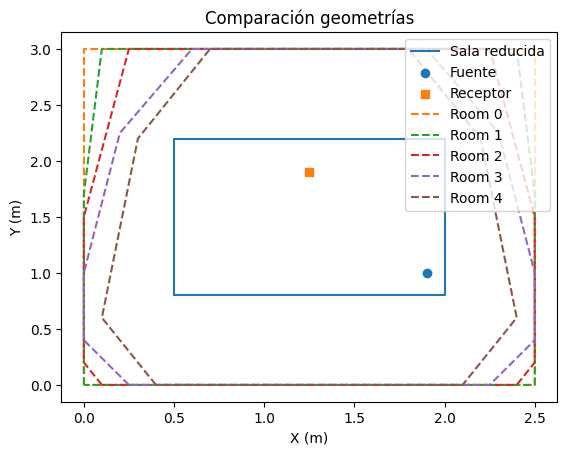

In [ ]:
# from plots.graph_room_outline import plot_room_outline

Lx = 250       # Largo de la sala en X 
Ly = 300       # Largo de la sala en Y
Lz = 220       # Alto de la sala
Dx = 50        # Delta X
Dy = 80        # Delta Y
Dz = 10        # Delta Z

# Posiciones fuente y receptor (en metros)
source_position = (1.9, 1.0, 1.3)
receptor_position = (1.25, 1.9, 1.2)

room_base = [(0, 0), (0, 3), (2.5, 3), (2.5, 0)]
room1 = [(0, 0), (0, 1.7), (0.1, 3), (2.4, 3), (2.5, 1.7), (2.5, 0)]
room2 = [(0.1, 0), (0, 0.2), (0, 1.5), (0.25, 3), (2.25, 3), (2.5, 1.5), (2.5, 0.2), (2.4, 0)]
room3 = [(0.25, 0), (0, 0.4), (0, 1), (0.2, 2.25), (0.6, 3), (1.9, 3), (2.3, 2.25), (2.5, 1), (2.5, 0.4), (2.25, 0)]
room4 = [(0.4, 0), (0.1, 0.6), (0.3, 2.2), (0.7, 3), (1.8, 3), (2.2, 2.2), (2.4, 0.6), (2.1, 0)]

multiple_rooms = [room_base, room1, room2, room3, room4]

plot_multiple_rooms(Lx, Ly, Dx, Dy, source_position, receptor_position, multiple_rooms, "Comparación geometrías")


Calculo el rta con FEM de cada configuración de cuarto

In [20]:
from FEM.FEM_source import FEM_Source_Solver_Average
from mesh.mesh_3D_complex import create_complex_mesh
import numpy as np

freqs = np.arange(20, 200, 1)

create_complex_mesh(room_base, Lz/100, source_position, 200, "room0")
create_complex_mesh(room1, Lz/100, source_position, 200, "room1")
create_complex_mesh(room2, Lz/100, source_position, 200, "room2")
create_complex_mesh(room3, Lz/100, source_position, 200, "room3")
create_complex_mesh(room4, Lz/100, source_position, 200, "room4")

rta_room0 = FEM_Source_Solver_Average(freqs, f"mallado/room0.msh", receptor_position)
rta_room1 = FEM_Source_Solver_Average(freqs, f"mallado/room1.msh", receptor_position)
rta_room2 = FEM_Source_Solver_Average(freqs, f"mallado/room2.msh", receptor_position)
rta_room3 = FEM_Source_Solver_Average(freqs, f"mallado/room3.msh", receptor_position)
rta_room4 = FEM_Source_Solver_Average(freqs, f"mallado/room4.msh", receptor_position)

Info    : Reading 'mallado/room0.msh'...
Info    : 33 entities
Info    : 6146 nodes
Info    : 36410 elements
Info    : Done reading 'mallado/room0.msh'
Info    : Reading 'mallado/room1.msh'...
Info    : 45 entities
Info    : 6144 nodes
Info    : 36433 elements
Info    : Done reading 'mallado/room1.msh'
Info    : Reading 'mallado/room2.msh'...
Info    : 57 entities
Info    : 5840 nodes
Info    : 34682 elements
Info    : Done reading 'mallado/room2.msh'
Info    : Reading 'mallado/room3.msh'...
Info    : 69 entities
Info    : 5222 nodes
Info    : 30842 elements
Info    : Done reading 'mallado/room3.msh'
Info    : Reading 'mallado/room4.msh'...
Info    : 57 entities
Info    : 4653 nodes
Info    : 27352 elements
Info    : Done reading 'mallado/room4.msh'


Evaluo el MCD de cada cuarto. De este análisis se saca la conclusión de que mover unos pocos centímetros los vértices de las geometrías puede generar una diferencia notables de hasta 1 dB en la figura de mérito.

In [21]:
from aux.merit_figure import merit_magnitude_deviation, merit_spatial_deviation

def merit_calc(rta):
    MD = merit_magnitude_deviation(rta)
    SD = merit_spatial_deviation(rta)
    FM = MD + SD
    return MD, SD, FM


In [22]:
MD0, SD0, FM0 = merit_calc(rta_room0)
MD1, SD1, FM1 = merit_calc(rta_room1)
MD2, SD2, FM2 = merit_calc(rta_room2)
MD3, SD3, FM3 = merit_calc(rta_room3)
MD4, SD4, FM4 = merit_calc(rta_room4)

print(f"Cuarto 0 | Magnitude Deviation {np.round(MD0, 2)}: | Spatial Deviation: {np.round(SD0, 2)} | Figura de mérito: {np.round(FM0, 2)}")
print(f"Cuarto 1 | Magnitude Deviation {np.round(MD1, 2)}: | Spatial Deviation: {np.round(SD1, 2)} | Figura de mérito: {np.round(FM1, 2)}")
print(f"Cuarto 2 | Magnitude Deviation {np.round(MD2, 2)}: | Spatial Deviation: {np.round(SD2, 2)} | Figura de mérito: {np.round(FM2, 2)}")
print(f"Cuarto 3 | Magnitude Deviation {np.round(MD3, 2)}: | Spatial Deviation: {np.round(SD3, 2)} | Figura de mérito: {np.round(FM3, 2)}")
print(f"Cuarto 4 | Magnitude Deviation {np.round(MD4, 2)}: | Spatial Deviation: {np.round(SD4, 2)} | Figura de mérito: {np.round(FM4, 2)}")

Cuarto 0 | Magnitude Deviation 13.54: | Spatial Deviation: 3.46 | Figura de mérito: 17.0
Cuarto 1 | Magnitude Deviation 13.93: | Spatial Deviation: 3.77 | Figura de mérito: 17.7
Cuarto 2 | Magnitude Deviation 13.56: | Spatial Deviation: 3.37 | Figura de mérito: 16.93
Cuarto 3 | Magnitude Deviation 12.87: | Spatial Deviation: 3.01 | Figura de mérito: 15.88
Cuarto 4 | Magnitude Deviation 12.49: | Spatial Deviation: 3.93 | Figura de mérito: 16.41


Grafico la respuesta en frecuencia de cada cuarto

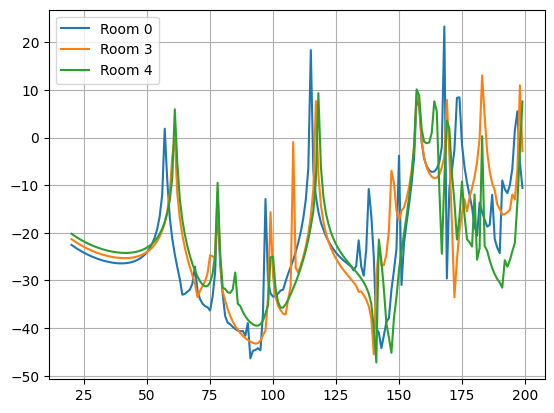

In [23]:
mag_room0 = np.sum(rta_room0, axis=0)/7
mag_room1 = np.sum(rta_room1, axis=0)/7
mag_room2 = np.sum(rta_room2, axis=0)/7
mag_room3 = np.sum(rta_room3, axis=0)/7
mag_room4 = np.sum(rta_room4, axis=0)/7

plt.plot(freqs, mag_room0, label='Room 0')
# plt.plot(freqs, mag_room1, label='Room 1')
# plt.plot(freqs, mag_room2, label='Room 2')
plt.plot(freqs, mag_room3, label='Room 3')
plt.plot(freqs, mag_room4, label='Room 4')
plt.grid()
plt.legend()

Comparo resultado de la geometría optima vs resultado optimizado de geometría simple

In [27]:
room_simple_best = [(0, 0), (0, 2.92), (2.18, 2.92), (2.18, 0)]
Lz = 2.17

create_complex_mesh(room_simple_best, Lz, source_position, 200, "best_simple_geo")
rta_best = FEM_Source_Solver_Average(freqs, "mallado/best_simple_geo.msh", receptor_position)
MD5, SD5, FM5 = merit_calc(rta_best)
print(f"Best room simple | Magnitude Deviation {np.round(MD5, 2)}: | Spatial Deviation: {np.round(SD5, 2)} | Figura de mérito: {np.round(FM5, 2)}")


Info    : Reading 'mallado/best_simple_geo.msh'...
Info    : 33 entities
Info    : 5755 nodes
Info    : 34197 elements
Info    : Done reading 'mallado/best_simple_geo.msh'
Best room simple | Magnitude Deviation 10.43: | Spatial Deviation: 2.52 | Figura de mérito: 12.95


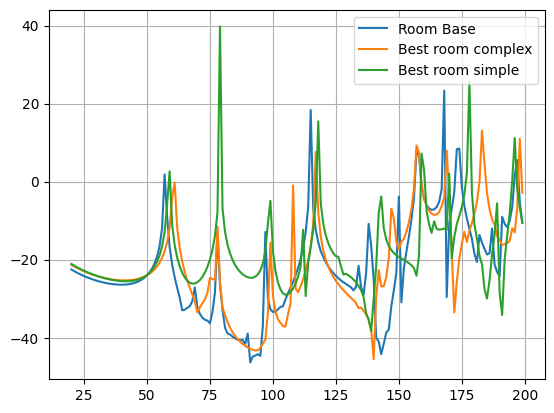

In [29]:
mag_best = np.sum(rta_best, axis=0)/7
plt.plot(freqs, mag_room0, label='Room Base')
plt.plot(freqs, mag_room3, label='Best room complex')
plt.plot(freqs, mag_best, label='Best room simple')
plt.grid()
plt.legend()


In [28]:
room_simple_best = [(0, 0), (0, 2.9235), (2.1764, 2.9235), (2.1764, 0)]
Lz = 2.1718

create_complex_mesh(room_simple_best, Lz, source_position, 200, "best_simple_geo")
rta_best = FEM_Source_Solver_Average(freqs, "mallado/best_simple_geo.msh", receptor_position)
MD5, SD5, FM5 = merit_calc(rta_best)
print(f"Best room simple | Magnitude Deviation {np.round(MD5, 2)}: | Spatial Deviation: {np.round(SD5, 2)} | Figura de mérito: {np.round(FM5, 2)}")



Info    : Reading 'mallado/best_simple_geo.msh'...
Info    : 33 entities
Info    : 5654 nodes
Info    : 33384 elements
Info    : Done reading 'mallado/best_simple_geo.msh'
Best room simple | Magnitude Deviation 10.79: | Spatial Deviation: 2.54 | Figura de mérito: 13.33


Se ve como ajustar dimensiones de forma muy sutil se pueden generar cambios perceptibles en las figuras de mérito